In [1]:
from scipy import io
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

In [2]:
head1 = io.loadmat('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/DATA/NeuroPAL_data/WholeBrain_Ca_Activity/YoungAdults/Head_Activity_OH16230.mat')
# 21 Heads, healthier than other strain 

tail1 = io.loadmat('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/DATA/NeuroPAL_data/WholeBrain_Ca_Activity/YoungAdults/Tail_Activity_OH16230.mat')
# 21 Tails

#print(head1.keys())
# print(len(head1['traces'][1][0][:]))
print(head1['stims'], len(head1['traces']))

[[2 1 3]
 [2 1 3]
 [2 1 3]
 [2 1 3]
 [2 1 3]
 [3 2 1]
 [3 2 1]
 [3 2 1]
 [3 2 1]
 [3 2 1]
 [3 2 1]
 [3 2 1]
 [1 3 2]
 [1 3 2]
 [1 3 2]
 [1 3 2]
 [1 3 2]
 [2 1 3]
 [1 3 2]
 [1 3 2]
 [2 1 3]] 109


In [3]:
# Here I want to pull out ASJ left and right
def LR_Traces(file, neuron_search, left_or_right): 
    
    neuron_number = [] #make empty list to save to first
    
    for i in range(0, len(file['neurons'])): #search for list of neuron names, for head1 it's 109 names
        if neuron_search in file['neurons'][i]:
            neuron_number = i #output the index number, i, of the neuron name that matches the search
    
    if not neuron_number: #a boolean, if neuron_number is empty, it will throw an error
        print("Error: Neuron being searched is not in file") 
    
    traces = file['traces'][neuron_number][0][0] #this is just to pull out the traces/data

    LeftNeuron_list = []
    RightNeuron_list = []
    nansNeuron_list = []

    is_L = file['is_L'][neuron_number][0][0] #this is to find if the neuron is Left or Right

    for i in range(0,len(is_L)): #loop through the L/R list, which is either 1, 0, or nans if there's no L/R neuron
        if is_L[i] == 1: # 1 = Left neuron
            LeftNeuron_list.append(traces[i][0][4:-1]) #exclude nans which are in the beginning (4 nans) and 1 nan at the end
        if is_L[i] == 0: # 0 = Right neuron
            RightNeuron_list.append(traces[i][0][4:-1])
        if np.isnan(is_L[i]): #nans = no Left or Right
            nansNeuron_list.append(traces[i][0][4:-1])
        #Notice that here the 'i' value represents the values in the is_L file, meaning that it's looping through 
        # either 42 ors 21 numbers. That means that the corresponding traces[i] value will match the 42/21 trials
        # for that neuron.
    
    if left_or_right == 'left': #Here you can choose which side neuron you want
        return LeftNeuron_list
    if left_or_right == 'right':
        return RightNeuron_list
    if left_or_right == 'neither': #if you know ahead of time that it only has one side, choose 'neither'
        return nansNeuron_list
    
ASJ_L = LR_Traces(head1, 'ASJ', 'left') #here I want to separate ASJ L and R, and I already know they're in the head
ASJ_R = LR_Traces(head1, 'ASJ', 'right')

print(ASJ_L[0][0:5])
print(len(ASJ_L))

[0.69081841 0.58638088 0.53735969 0.4781422  0.46635362]
21


In [89]:
## WHEN  RUNNING KERNEL WITH OLD NUMPY ###
def Neurons_list(heads_or_tails, names_or_traces): #this will make a master list of the neuron names and their traces
    if heads_or_tails == 'heads': #you can choose which dataset you want, heads or tails
        data_file = head1
    if heads_or_tails == 'tails':
        data_file = tail1
        
    names_temp = [] 
    traces_temp = []

    for i in range(len(data_file['neurons'])): 

        name = data_file['neurons'][i][0][0] #the files are in dictionary format, so you have to index, and then extract the first value of the nested list
        trace = data_file['traces'][i][0][0] 
        is_L = data_file['is_L'][i][0][0] 

        for j in range(0,len(is_L)):  
            if is_L[j] == 1: # 1 = Left neuron
                names_temp.append(name + '_L') #here you can add the letter 'L' to the end of the name
                traces_temp.append(trace[j][0][4:-1]) #exclude nans, which are 4 nans in beginning, 1 nan at end
                #print(len(trace[i][0][4:-1]))

            if is_L[j] == 0: # 0 = Right neuron
                names_temp.append(name + '_R')
                traces_temp.append(trace[j][0][4:-1])
            if np.isnan(is_L[j]): # nans = no left or right neuron
                names_temp.append(name) 
                traces_temp.append(trace[j][0][4:-1])

    names = [] #want to remove the duplicates
    for i in names_temp: # the names_temp basically looks like 'neuronL','neuronL','neuronL', etc and 'neuronR','neuronR'
        if i not in names: 
            names.append(i) #saving unique names to list 'names' from list 'names_temp'

    traces = np.reshape(traces_temp,(len(names), 21))
    # reshape is a function to basically take a big array and tell the dimensions that you want to reshape to
    # because the length of the names corresponds to how many traces SETS we have, we can use that variable as a number
    # and we already know that one SET has 21 
    
    if names_or_traces == 'names': #here you can choose whether you want the list of names or the traces data
        return names
    if names_or_traces == 'traces':
        return traces

head_names = Neurons_list('heads', 'names')
head_traces = Neurons_list('heads', 'traces')

tail_names = Neurons_list('tails', 'names')
tail_traces = Neurons_list('tails', 'traces')

print(len(head_traces))
print(len(head_traces[0]))
print(head_traces[0])
print(len(head_traces[0][5]))


#print(head_traces[0]) 

#print(len(tail_traces))
#print(len(tail_traces[0]))
#print(type(tail_traces[0]))

189
21
[array([ 1.82573985e-01,  2.24443082e-02, -2.41969430e-02,  7.78534599e-02,
        -2.13752063e-02, -2.99994323e-02, -3.39300043e-02, -7.30530932e-02,
         1.11121350e-02,  3.41484514e-02, -1.27338563e-01, -1.54904477e-01,
        -7.96019527e-02, -2.79733385e-01, -6.22447517e-02, -2.15895463e-01,
        -2.37725749e-01, -1.73995758e-01, -1.87504958e-01, -2.01001889e-01,
        -1.76046932e-01, -1.94673843e-01, -1.06700984e-01, -1.78101781e-01,
        -2.33276920e-01, -2.33106269e-01, -1.96671955e-01, -2.24335610e-01,
        -1.60516357e-01, -2.64131889e-01, -1.13201249e-01, -1.67541894e-01,
        -1.06287049e-01, -7.51191586e-02, -7.82364624e-02, -2.89781840e-02,
        -1.84360834e-01, -1.05954287e-01, -1.40035225e-02, -5.73661797e-02,
        -2.01032575e-01, -1.44410113e-01, -2.07318012e-01, -1.38826722e-01,
        -9.70536084e-02, -2.31980234e-01, -1.50852102e-01, -9.10458134e-02,
        -1.60322940e-01, -1.89488985e-01, -2.85954497e-02, -1.52787398e-01,
     

In [25]:
### WHEN RUNNING WITH NEW NUMPY KERNEL ###
# def Neurons_list(heads_or_tails, names_or_traces): #this will make a master list of the neuron names and their traces
#     if heads_or_tails == 'heads': #you can choose which dataset you want, heads or tails
#         data_file = head1
#     if heads_or_tails == 'tails':
#         data_file = tail1
        
#     names_temp = [] 
#     traces_temp = []

#     for i in range(len(data_file['neurons'])): 

#         name = data_file['neurons'][i][0][0] #the files are in dictionary format, so you have to index, and then extract the first value of the nested list
#         trace = data_file['traces'][i][0][0] 
#         is_L = data_file['is_L'][i][0][0] 

#         for j in range(0,len(is_L)):  
#             traces_temptemp = trace[j][0][4:-1]
#             diff = 955 - len(traces_temptemp)
#             if is_L[j] == 1: # 1 = Left neuron
#                 names_temp.append(name + '_L') #here you can add the letter 'L' to the end of the name
#                 traces_temptemp = np.append(traces_temptemp, [np.nan]*diff ) #exclude nans, which are 4 nans in beginning, 1 nan at end
#                 traces_temp.append(traces_temptemp) 

#             if is_L[j] == 0: # 0 = Right neuron
#                 names_temp.append(name + '_R')
#                 traces_temptemp = np.append(traces_temptemp, [np.nan]*diff ) #exclude nans, which are 4 nans in beginning, 1 nan at end
#                 traces_temp.append(traces_temptemp) 

#             if np.isnan(is_L[j]): # nans = no left or right neuron
#                 names_temp.append(name) 
#                 traces_temptemp = np.append(traces_temptemp, [np.nan]*diff ) #exclude nans, which are 4 nans in beginning, 1 nan at end
#                 traces_temp.append(traces_temptemp) 


#     names = [] #want to remove the duplicates
#     for i in names_temp: # the names_temp basically looks like 'neuronL','neuronL','neuronL', etc and 'neuronR','neuronR'
#         if i not in names: 
#             names.append(i) #saving unique names to list 'names' from list 'names_temp'

    
#     traces = np.reshape(traces_temp,(len(names), 21, 955))
#     # reshape is a function to basically take aS big array and tell the dimensions that you want to reshape to
#     # because the length of the names corresponds to how many traces SETS we have, we can use that variable as a number
#     # and we already know that one SET has 21 
    
#     if names_or_traces == 'names': #here you can choose whether you want the list of names or the traces data
#         return names
#     if names_or_traces == 'traces':
#         return traces

# head_names = Neurons_list('heads', 'names')
# head_traces = Neurons_list('heads', 'traces')

# tail_names = Neurons_list('tails', 'names')
# tail_traces = Neurons_list('tails', 'traces')

# print(head_names)
# print(len(head_traces))
# #print(head_traces[0]) 

# print(tail_names)
# print(len(tail_traces))
# print(tail_traces[0])
# print(type(tail_traces[0]))

In [6]:
## Correlate ASJ with all neurons
def Correlate(neuron1, ASJ_neuron): #neuron 1 is the list of neurons, ASJ_neuron is ASJ L or R

    correlations = np.empty((len(neuron1), 21)) #make an empty array with the same number of rows as there are neurons (189 for head, 42 for tail), and 21 traces
    
    correlations[:] = np.nan #fill with nans

    for i in range(0,len(neuron1)): #loop through each neuron
        for j in range(0, 21): #loop through each of the 21 trials
            try: #using try, except, and continue together is useful because if something doesn't work, it will skip instead of 'breaking' the loop 
                length = len(neuron1[i][j]) 
                corr = np.corrcoef(neuron1[i][j][:length], ASJ_neuron[j][:length]) #setting so the length of the neuron trace is the same for both #np.corrcoef uses the Pearson correlation coefficient test
                correlations[i][j] = corr[0][1]
                # now save that value in the correlations list of nans. correlations[i][j] will now correspond with the location
                # of neuron1[i][j]. the corr[0][1] is just a weird part of the corrcoef function - this location
                # just refers to the actual correlation value
            except: 
                continue 
            
    return correlations

corr_head_ASJ_L = Correlate(head_traces, ASJ_L)
corr_head_ASJ_R = Correlate(head_traces, ASJ_R)

corr_tail_ASJ_L = Correlate(tail_traces, ASJ_L)
corr_tail_ASJ_R = Correlate(tail_traces, ASJ_R)

/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [7]:
# I realized that since you want the top 10 hits of ALL neurons (heads and tails), then we should combine everything
# Now we'll just keep the ASJL data and ASJR data separated, but combine heads and tails for each

all_names = head_names+tail_names
all_traces_L = np.concatenate((corr_head_ASJ_L, corr_tail_ASJ_L))
all_traces_R = np.concatenate((corr_head_ASJ_R, corr_tail_ASJ_R))

print(len(corr_head_ASJ_L))
print(len(corr_tail_ASJ_L))
print(len(all_traces_L))

189
42
231


In [8]:
def Ranking(array, names, analysis_variable): 
    ranked = np.zeros((len(names), 21)) #make empty array the length of all neurons (189), by 21 trials
    name = []
    medians = []
    true_medians = []
    ranked_meds = []
    absolute_meds = []

    for i in array: 
        med = np.nanmedian(i) #want the median value of the correlation values because medians will exclude weird outliers
        medians.append(abs(med)) #correlation is correlation, doesn't matter positive or negative
        true_medians.append(med)
        
    reverse_sort = np.sort(medians)[::-1] #sorts highest to highest

    for i in range(0,len(names)): 
        where = np.where(reverse_sort[i] == medians) #find where the value of the reverse_sort ranking matches the values of the medians
        num_where = where[0][0]
        ranked[i] = (array[num_where]) #now I can save the location of the neuron order to 'ranked'
        name.append(names[num_where]) #appending name of indexed neuron
        ranked_meds.append(true_medians[num_where])
        absolute_meds.append(medians[num_where])
        
    if analysis_variable == 'names':
        return name
    if analysis_variable == 'correlations':
        return ranked
    if analysis_variable == 'medians': #this will be ranked based on absolute value, but I don't think you need it anymore
        return absolute_meds
    if analysis_variable == 'true medians': #this is ranking with their true values
        return ranked_meds

rank_ASJ_L = Ranking(all_traces_L, all_names, 'correlations')
#print(rank_ASJ_L)
rank_ASJ_L_names = Ranking(all_traces_L, all_names, 'names')
print(rank_ASJ_L_names)
rank_ASJ_L_meds = Ranking(all_traces_L, all_names, 'true medians')
#print(rank_ASJ_L_names[:10]) #if you want just top 10 hits

rank_ASJ_R = Ranking(all_traces_R, all_names, 'correlations')
rank_ASJ_R_names = Ranking(all_traces_R, all_names, 'names')
rank_ASJ_R_meds = Ranking(all_traces_R, all_names, 'true medians')
print(rank_ASJ_R_names)

['ASJ_L', 'ASJ_R', 'AUA_L', 'AWC_L', 'AIA_R', 'AIZ_L', 'AVD_L', 'SMBV_L', 'RIF_L', 'RIC_R', 'AUA_R', 'ASH_R', 'AWB_R', 'DD1', 'ASH_L', 'SABV_L', 'RMH_L', 'AVL', 'VD1', 'AIY_R', 'SAAD_L', 'AWC_R', 'ADA_L', 'NSM_L', 'ADF_L', 'ALN_R', 'SIAD_R', 'ASK_R', 'SIBD_L', 'CEPD_L', 'AIN_R', 'SMBD_L', 'SABV_R', 'RMD_L', 'SAAD_R', 'RIA_R', 'IL1V_R', 'CEPV_R', 'VA1', 'NSM_R', 'SIAV_L', 'RMF_L', 'RMDD_L', 'M3_L', 'I2_R', 'AIA_L', 'PVC_L', 'AVD_R', 'RMH_R', 'AIM_L', 'M3_R', 'URX_R', 'I3', 'IL2D_L', 'ADE_L', 'AVJ_R', 'AVF_R', 'I5', 'IL1D_R', 'PLN_R', 'AVK_R', 'AIB_L', 'MC_L', 'MI', 'PVR', 'URX_L', 'PVC_R', 'ADL_R', 'AIZ_R', 'ASG_L', 'IL2V_R', 'AIB_R', 'AVE_L', 'PVW_R', 'RMF_R', 'ASK_L', 'AVH_L', 'RIC_L', 'AQR', 'RMDV_R', 'ADF_R', 'AVF_L', 'RIG_L', 'M2_R', 'I2_L', 'PVW_L', 'RMG_L', 'VD11', 'LUA_L', 'OLQD_L', 'RIP_R', 'PVN_L', 'PHC_L', 'LUA_R', 'SAAV_L', 'DVB', 'IL2D_R', 'AIM_R', 'AIN_L', 'MC_R', 'SAAV_R', 'AVJ_L', 'RIM_L', 'AVG', 'IL1V_L', 'ADE_R', 'DB2', 'RIG_R', 'M2_L', 'RIS', 'CEPD_R', 'URAD_L', 'FLP_

In [9]:
# Just the top 10 hits
top10_rank_ASJ_L = rank_ASJ_L[0:12]
#print(top10_rank_ASJ_L)
top10_rank_ASJ_L_names = rank_ASJ_L_names[0:12] 
print(top10_rank_ASJ_L_names)

#I noticed that the top 2 hits are with itself (ASJL and ASJR) lol, so we can use [2:12] instead of [:10]
#BUT if you want to show that the top 2 hits are with itself, then use the [:10], idk if Andrew would want to 
#show that, because it's actually a good control and proof of concept to show that the ranking system works lol :) 

# ------- #
# Okay I plotted the original top10 hits, but I noticed 2 of them were strange for ASJ R dataset
#if you use [2:12] then it's index 0 and 3 that are strange
#if you use [:10] then it would be index 2 and 5
#make sure you match the index below accordingly based on if you use [2:12] or [:10]
# so the new index is going to ignore these 2, but if you want to plot it then you can just use [2:12] or [:10]

top10_rank_ASJ_R = np.concatenate((rank_ASJ_R[:2] , rank_ASJ_R[3:5], rank_ASJ_R[6:14])) #this is for [2:12]
#If you want index for [:10] then it would be [:2] + [3:5] + [6:12]
#print(top10_rank_ASJ_R)

top10_rank_ASJ_R_names = rank_ASJ_R_names[:2] + rank_ASJ_R_names[3:5] + rank_ASJ_R_names[6:14]
print(top10_rank_ASJ_R_names)


['ASJ_L', 'ASJ_R', 'AUA_L', 'AWC_L', 'AIA_R', 'AIZ_L', 'AVD_L', 'SMBV_L', 'RIF_L', 'RIC_R', 'AUA_R', 'ASH_R']
['ASJ_R', 'ASJ_L', 'SIAV_L', 'RMF_L', 'RMH_R', 'AIM_L', 'RMF_R', 'AUA_L', 'SMBV_L', 'ASK_R', 'I2_R', 'AUA_R']


In [10]:
# If you want to know if the neuron is in the head or tail, since we ended up combining everything, we can use this simple code 
location_L = []

for i in top10_rank_ASJ_L_names:
    if i in head_names:
        location_L.append('Head')
    else:
        location_L.append('Tail')
        
print(location_L)

location_R = []

for i in top10_rank_ASJ_R_names:
    if i in head_names:
        location_R.append('Head')
    else:
        location_R.append('Tail')
        
print(location_R)

['Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head']
['Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head']


/var/folders/z5/5sg9bhn17hg_r7jh5xr4v22r0000gq/T/ipykernel_41321/2203212316.py:13: UserWarning: 
The palette list has fewer values (8) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=dF_L, palette=colors1, linewidth = 5)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 70.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/var/folders/z5/5sg9bhn17hg_r7jh5xr4v22r0000gq/T/ipykernel_41321/2203212316.py:13: UserWarning: 
The palette list has fewer values (8) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=dF_L, palette=colors1, linewidth = 5)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 70.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

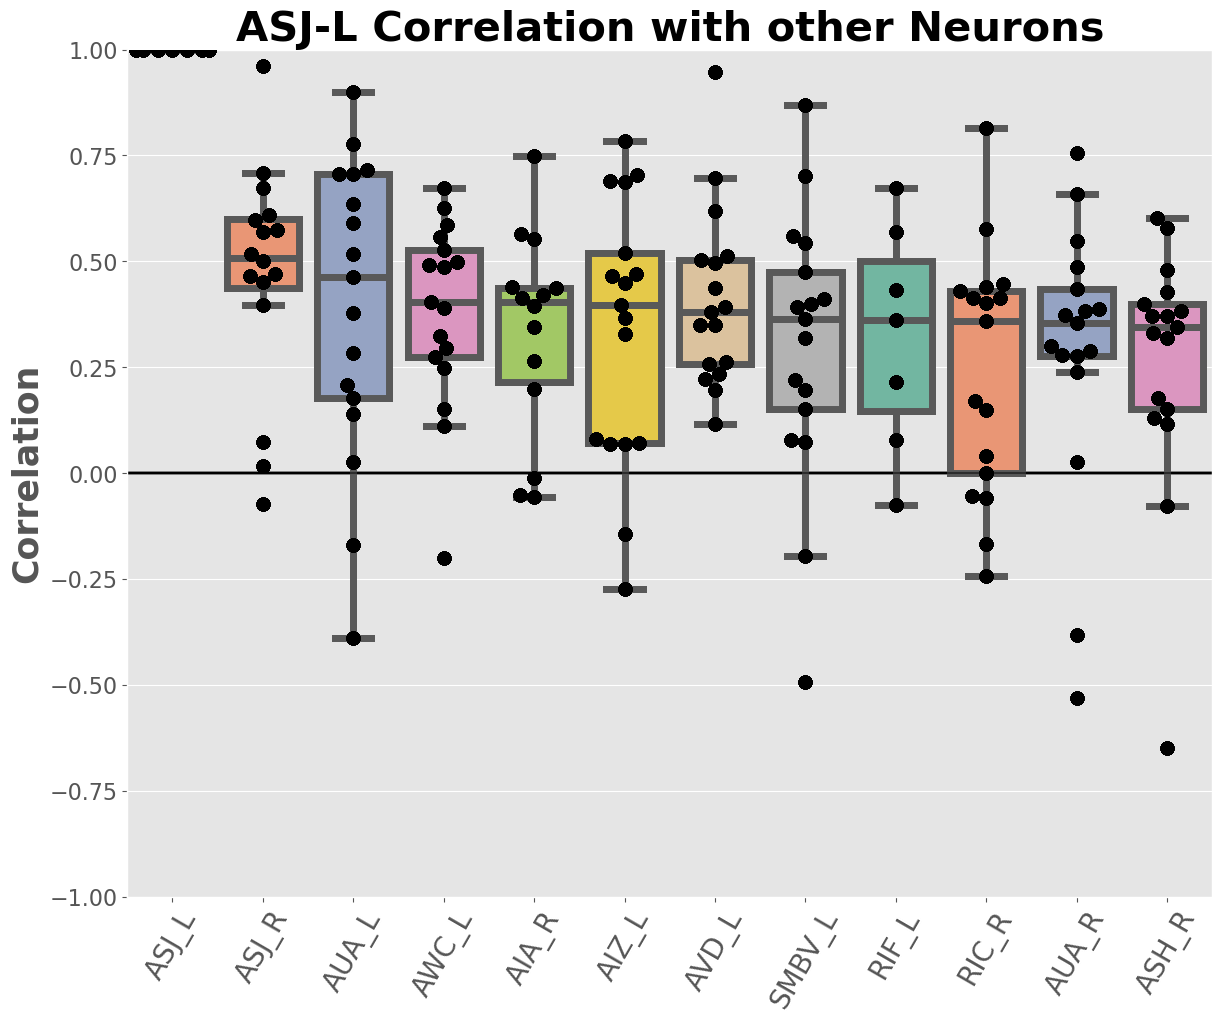

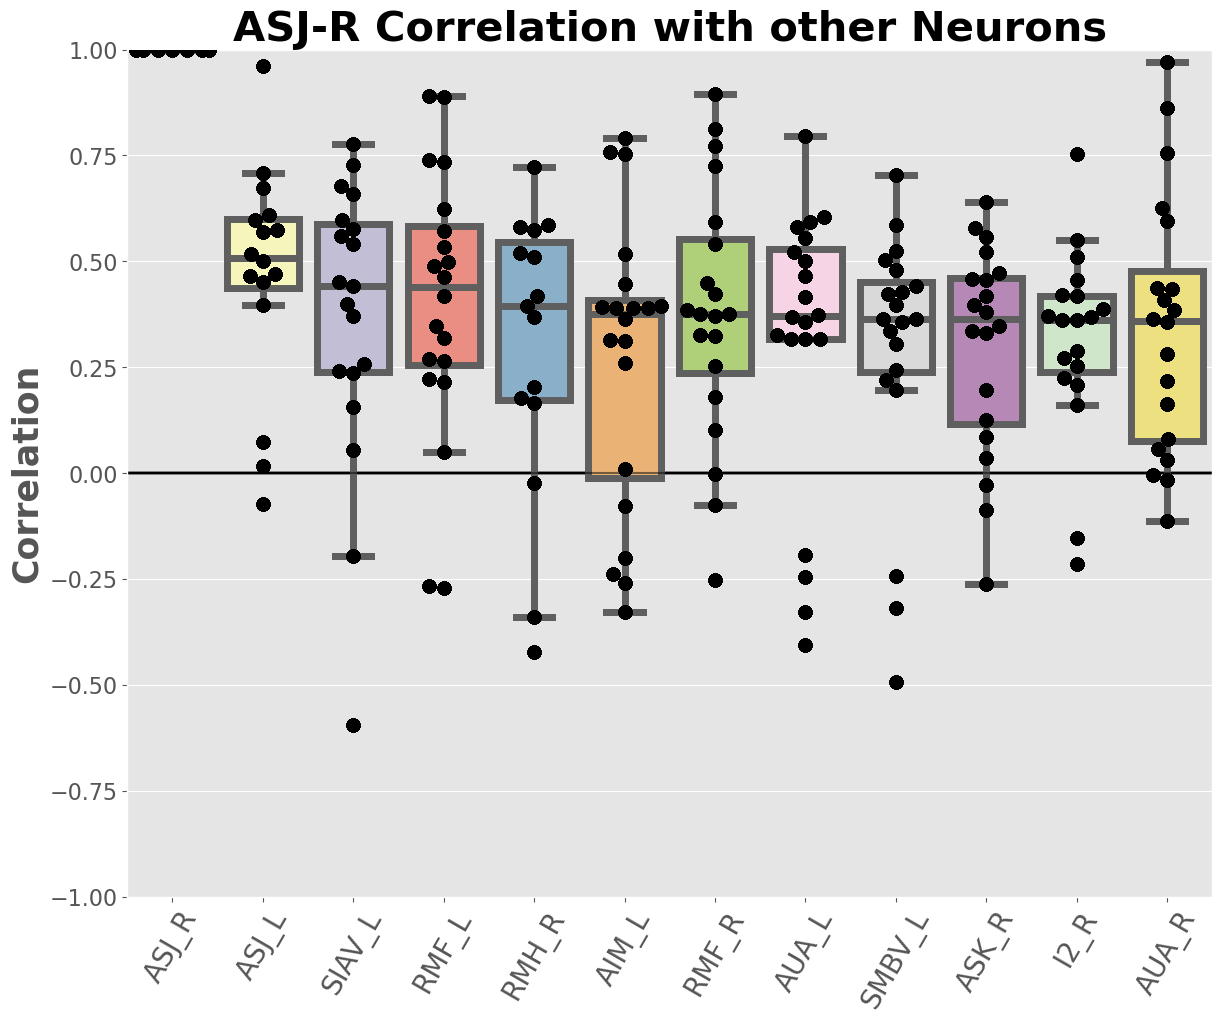

In [11]:
# This is plotting the top 10
dF_L = pd.DataFrame(top10_rank_ASJ_L.T, columns=top10_rank_ASJ_L_names) #make a pandas dataframe-easier for plotting
#Notice that I used .T, that transposes things to make them inverted (I have no idea why, but plotting boxplots 
#makes things inverted for some reason...)
#print(dF_L)

plt.style.use("ggplot") #to have plot look more like ggplot2 in R
colors1 = sns.color_palette("Set2") #If you look up 'matplotlib colormap reference' you can find a list of options

fig, ax = plt.subplots(1,1, figsize=(14,11), facecolor='w') #this establishes the plotting
for i in top10_rank_ASJ_L.T: #this is for plotting the connecting lines, normally you don't need to loop to plot
    ax.set_title('ASJ-L Correlation with other Neurons', fontsize=30, weight='bold') 
    sns.boxplot(data=dF_L, palette=colors1, linewidth = 5) 
    sns.swarmplot(data=dF_L, size=10, color='black') 
    #ax.plot(i, alpha=0.5) #for plotting connecting lines - to look at trends of trials across neurons
    plt.xticks(rotation=60) 
    ax.set_ylabel('Correlation', fontsize=25, weight='bold')
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=16)
    ax.set_ylim([-1,1])
    plt.axhline(y=0, color='black', alpha=0.5) #I drew a black line for number 0 because that shows no correlation
    plt.savefig('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/plots/031424_ASJ_L_Ranked_Correlations.png', dpi = 900)



# Repeat the same things for ASJ R    
dF_R = pd.DataFrame(top10_rank_ASJ_R.T, columns=top10_rank_ASJ_R_names)
#print(dF_R)

plt.style.use("ggplot") #to have plot look more like ggplot2 in R
colors2 = sns.color_palette("Set3")

fig, ax = plt.subplots(1,1, figsize=(14,11), facecolor='w')
for i in top10_rank_ASJ_R.T:
    ax.set_title('ASJ-R Correlation with other Neurons', fontsize=30, weight='bold')
    sns.boxplot(data=dF_R, palette=colors2, linewidth = 5)
    sns.swarmplot(data=dF_R, size=10, color='black')
    #ax.plot(i, alpha=0.5)
    plt.xticks(rotation=60)
    ax.set_ylabel('Correlation', fontsize=25, weight='bold')
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=16)
    ax.set_ylim([-1,1])
    plt.axhline(y=0, color='black', alpha=0.5)
    plt.savefig('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/plots/031424_ASJ_R_Ranked_Correlations.png', dpi = 900)

/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 94.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 94.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 35.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cmdb/mambaforge/envs/ASJ_neuron_2/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


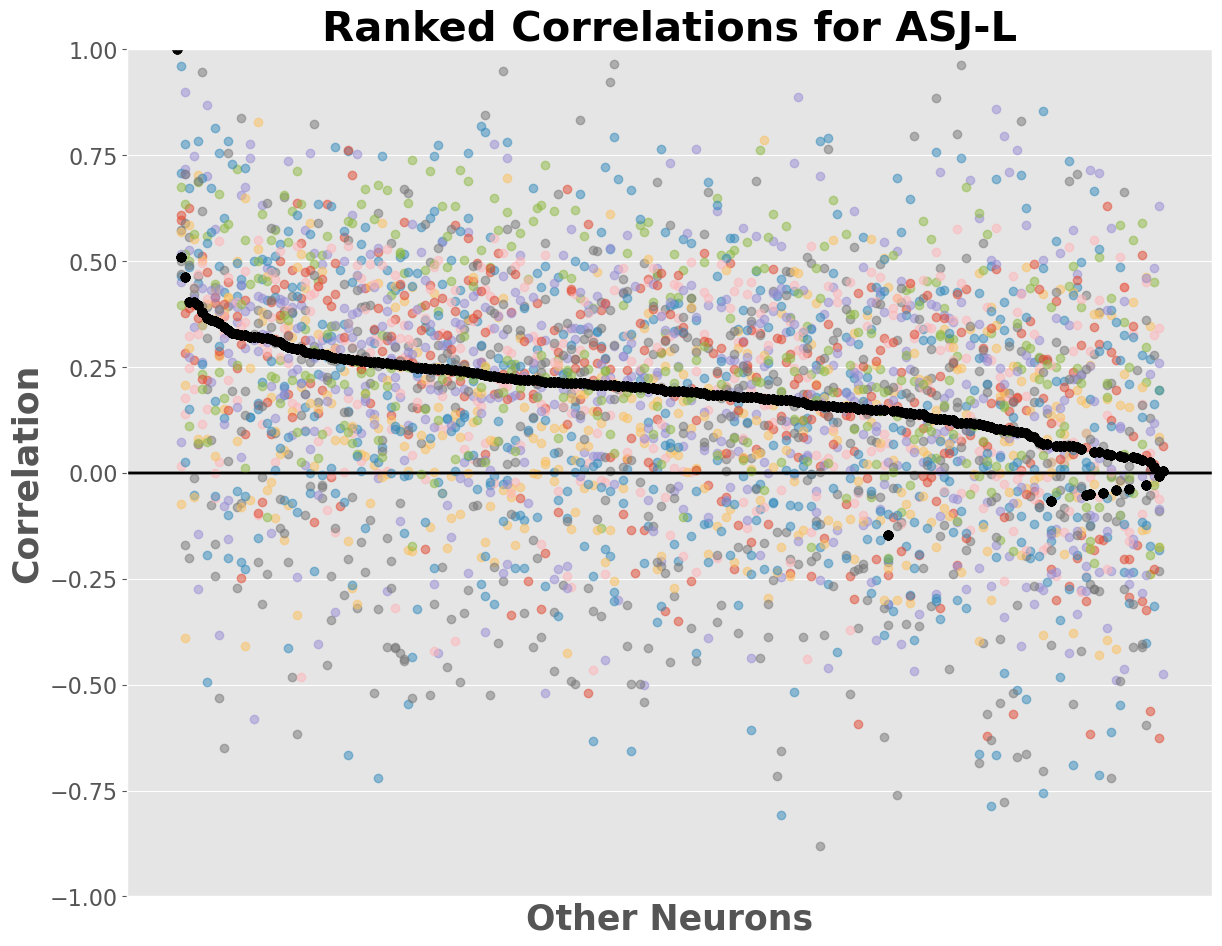

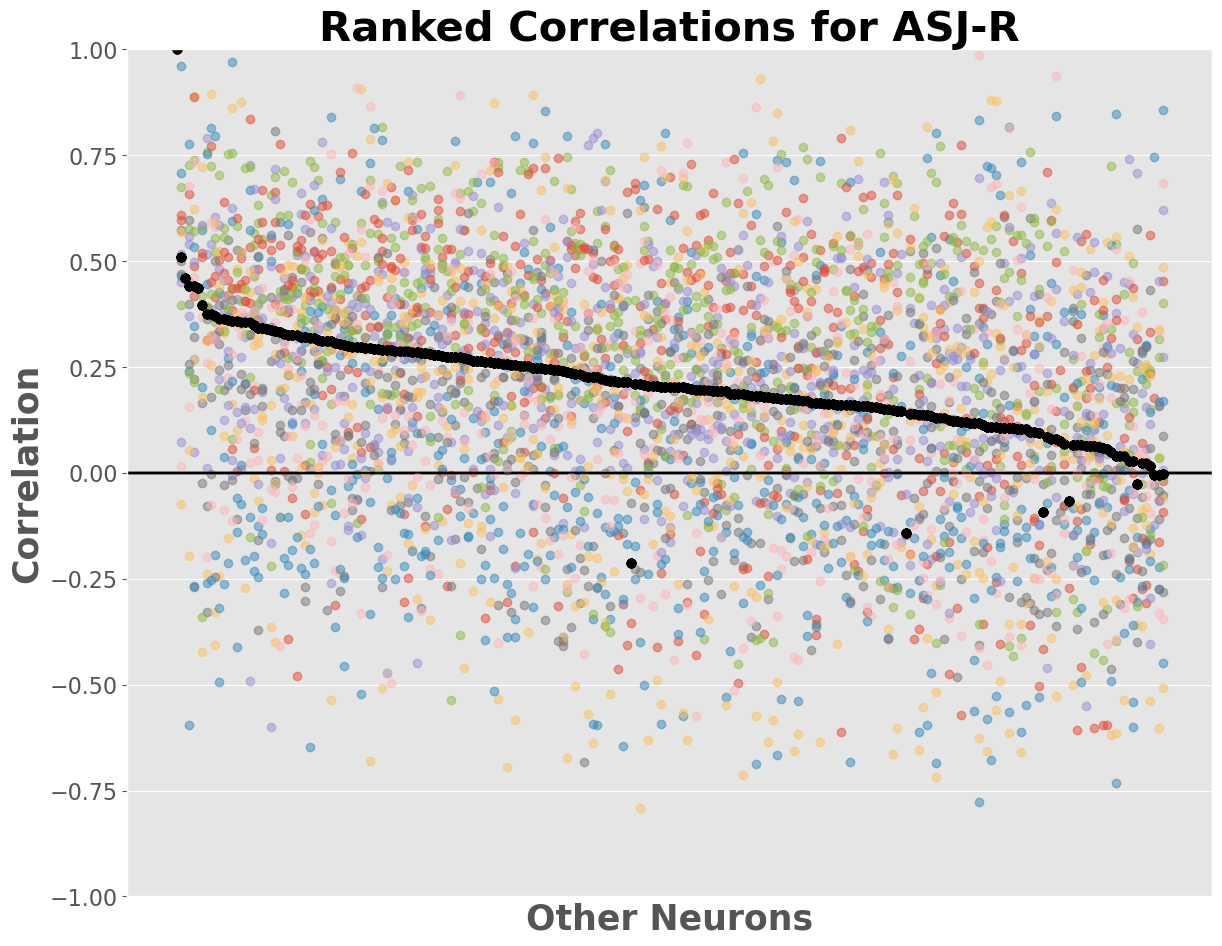

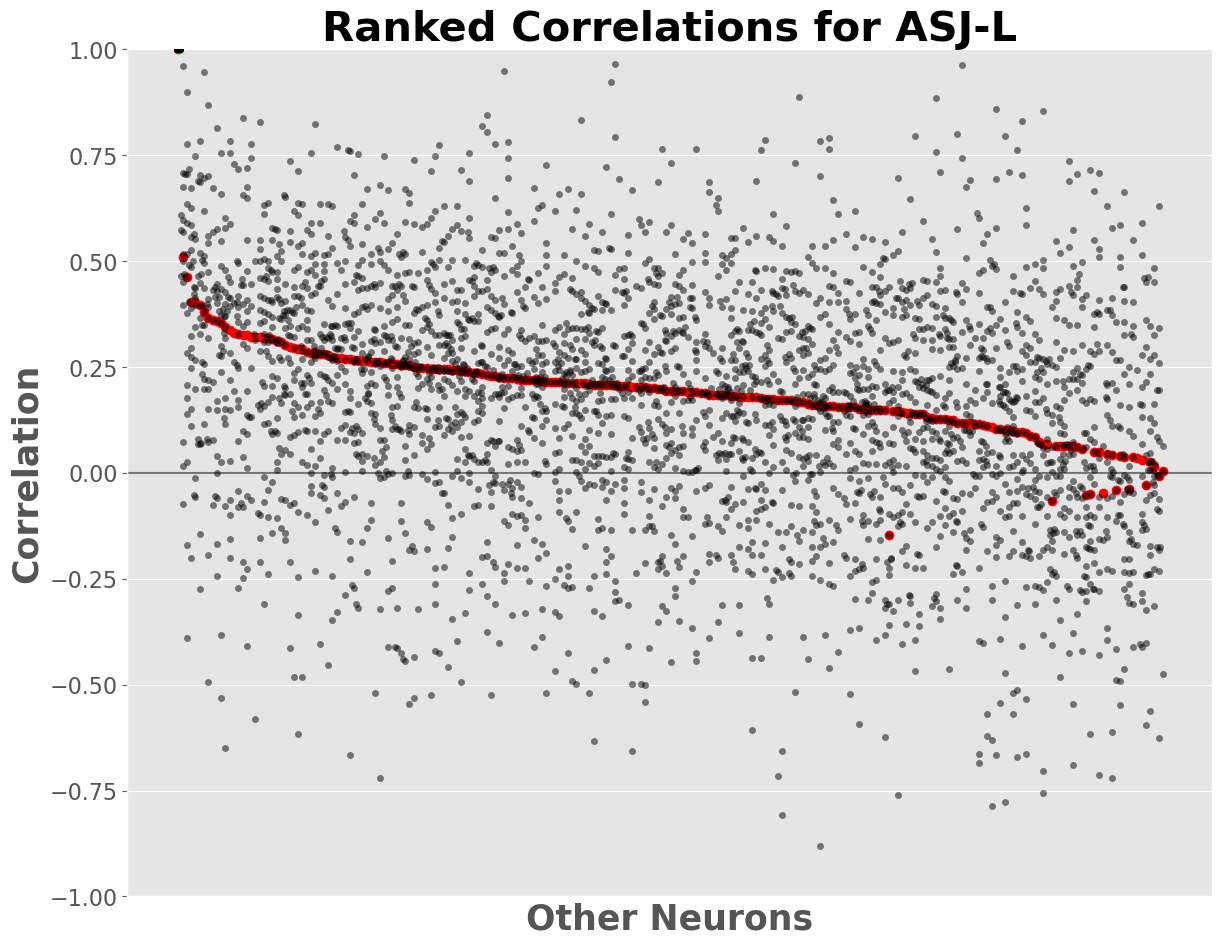

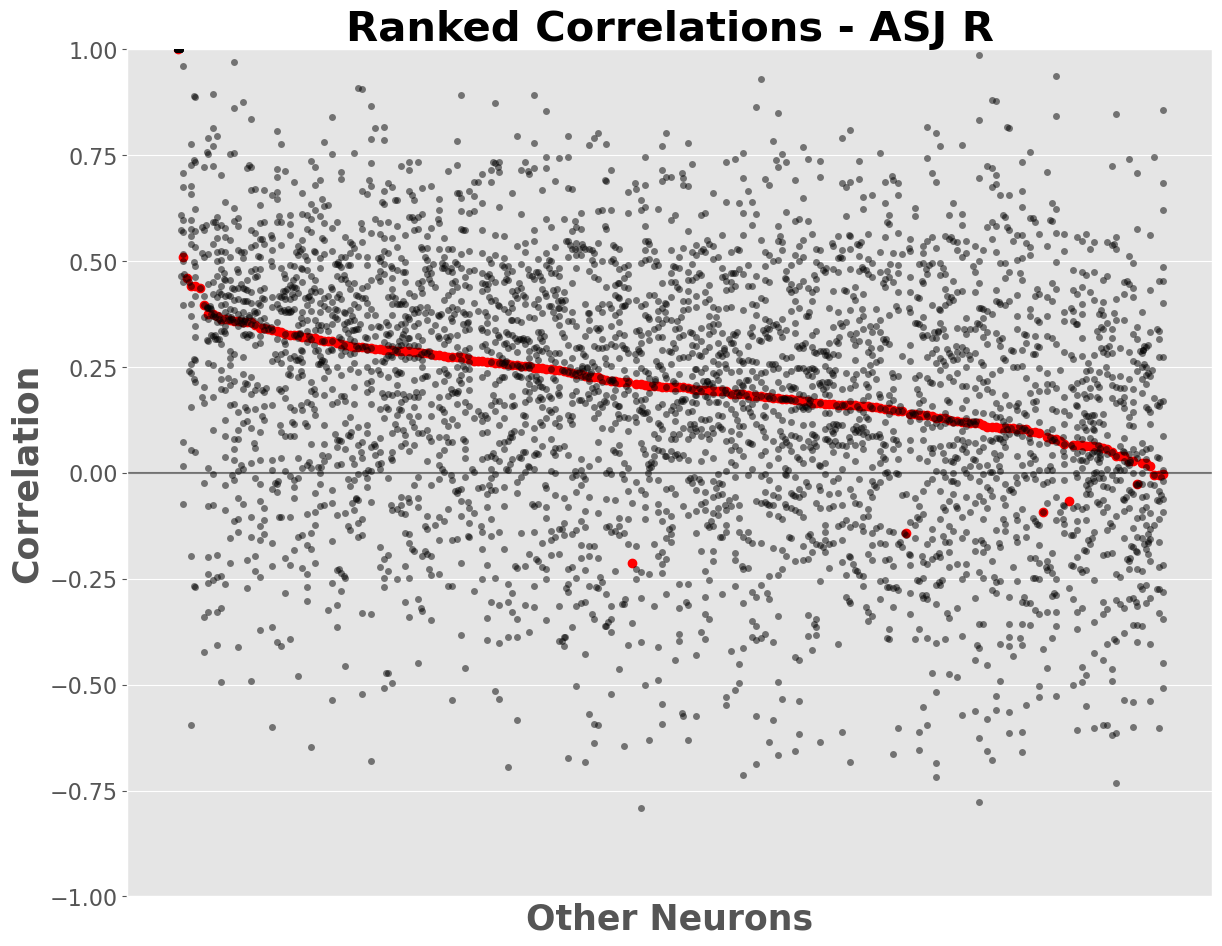

In [12]:
# This is plotting ALL the correlations, and I added the medians as a red color to show
# COLORFUL VERSION
plt.style.use("ggplot") #to have plot look more like ggplot2 in R

count=1
fig, ax = plt.subplots(1,1, figsize=(14,11), facecolor='w') #this establishes the plotting
for i in rank_ASJ_L.T:
    ax.set_title('Ranked Correlations for ASJ-L', fontsize=30, weight='bold') #title
    #sns.swarmplot(data=dF_ALL_L, alpha=0) #plot each individual trial dot using swarmplot
    ax.plot(rank_ASJ_L_names, rank_ASJ_L_meds, 'o', color='black') #this is plotting the medians
    ax.plot(rank_ASJ_L_names, i,'o', alpha=0.5, label = count) 
    ax.set_ylabel('Correlation', fontsize=25, weight='bold')
    ax.set_xlabel('Other Neurons', fontsize=25, weight='bold')
    ax.set_xticks([])    
    ax.tick_params(axis= 'y', labelsize=16)
    ax.set_ylim([-1,1])
    plt.axhline(y=0, color='black', alpha=0.5) 
    count += 1
    #plt.savefig('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/plots/031424_ASJ_L_Ranked_Correlations.png') #here you can save your figure
 
# Repeat the same things for ASJ R    
#print(dF_R)
count=1
fig, ax = plt.subplots(1,1, figsize=(14,11), facecolor='w')
for i in rank_ASJ_R.T:
    ax.set_title('Ranked Correlations for ASJ-R', fontsize=30, weight='bold')
    ax.plot(rank_ASJ_R_names, i,'o', alpha=0.5, label = count)
    ax.plot(rank_ASJ_R_names, rank_ASJ_R_meds, 'o', color='black') #this is plotting the medians
    ax.set_ylabel('Correlation', fontsize=25, weight='bold')
    ax.set_xlabel('Other Neurons', fontsize=25, weight='bold')
    ax.set_xticks([])
    ax.tick_params(axis= 'y', labelsize=16)
    ax.set_ylim([-1,1])
    plt.axhline(y=0, color='black', alpha=0.5)
    count += 1
    #plt.savefig('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/plots/031424_ASJ_R_Ranked_Correlations.png')

# This is plotting ALL the correlations, and I added the medians as a red color to show
# BLACK/RED VERSION

dF_ALL_L = pd.DataFrame(rank_ASJ_L.T, columns=rank_ASJ_L_names) #make a pandas dataframe-easier for plotting
#Notice that I used .T, that transposes things to make them inverted (I have no idea why, but plotting boxplots 
#makes things inverted for some reason...)
#print(dF_L)
fig, ax = plt.subplots(1,1, figsize=(14,11), facecolor='w')
ax.set_title('Ranked Correlations for ASJ-L', fontsize=30, weight='bold')
sns.swarmplot(data=dF_ALL_L, color='black', alpha=0.5)
ax.plot(rank_ASJ_L_names, rank_ASJ_L_meds, 'o', color='red') #this is plotting the medians
ax.set_ylabel('Correlation', fontsize=25, weight='bold')
ax.set_xlabel('Other Neurons', fontsize=25, weight='bold')
ax.set_xticks([])
ax.tick_params(axis= 'y', labelsize=16)
ax.set_ylim([-1,1])
plt.axhline(y=0, color='black', alpha=0.5)
#plt.savefig('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/plots/031424_ASJ_L_Ranked_Correlations.png') #here you can save your figure

# Repeat the same things for ASJ R    
dF_ALL_R = pd.DataFrame(rank_ASJ_R.T, columns=rank_ASJ_R_names)
#print(dF_R)

fig, ax = plt.subplots(1,1, figsize=(14,11), facecolor='w')
ax.set_title('Ranked Correlations - ASJ R', fontsize=30, weight='bold')
sns.swarmplot(data=dF_ALL_R, color='black', alpha=0.5)
ax.plot(rank_ASJ_R_names, rank_ASJ_R_meds, 'o', color='red') #this is plotting the medians
ax.set_ylabel('Correlation', fontsize=25, weight='bold')
ax.set_xlabel('Other Neurons', fontsize=25, weight='bold')
ax.set_xticks([])
ax.yaxis.set_tick_params(labelsize=16)
ax.set_ylim([-1,1])
plt.axhline(y=0, color='black', alpha=0.5)
#plt.savefig('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/plots/031424_ASJ_R_Ranked_Correlations.png')
    

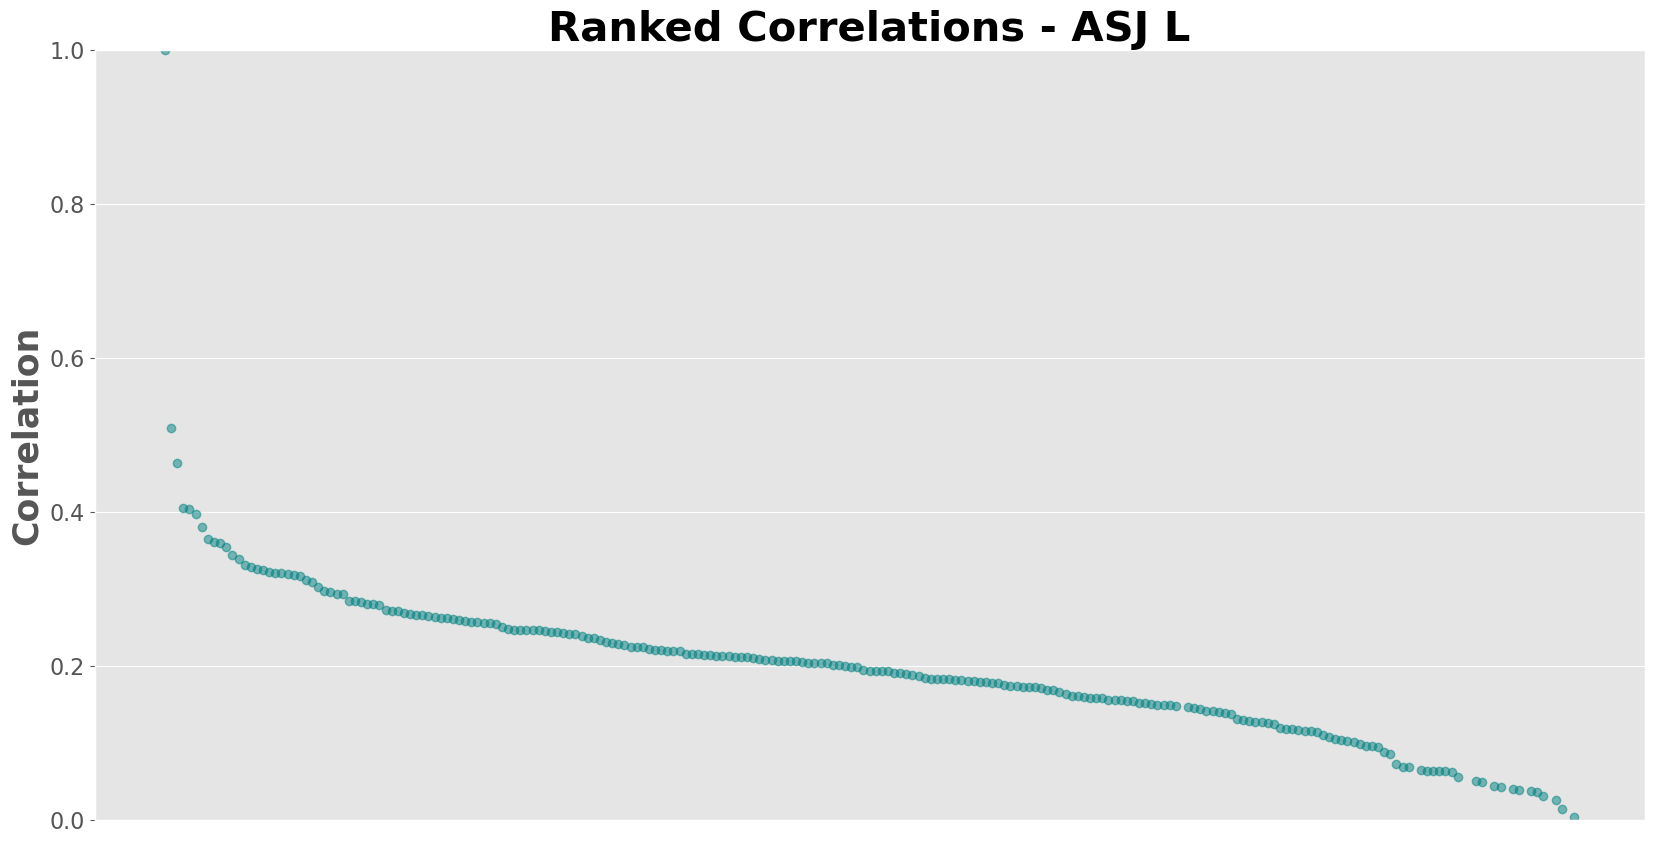

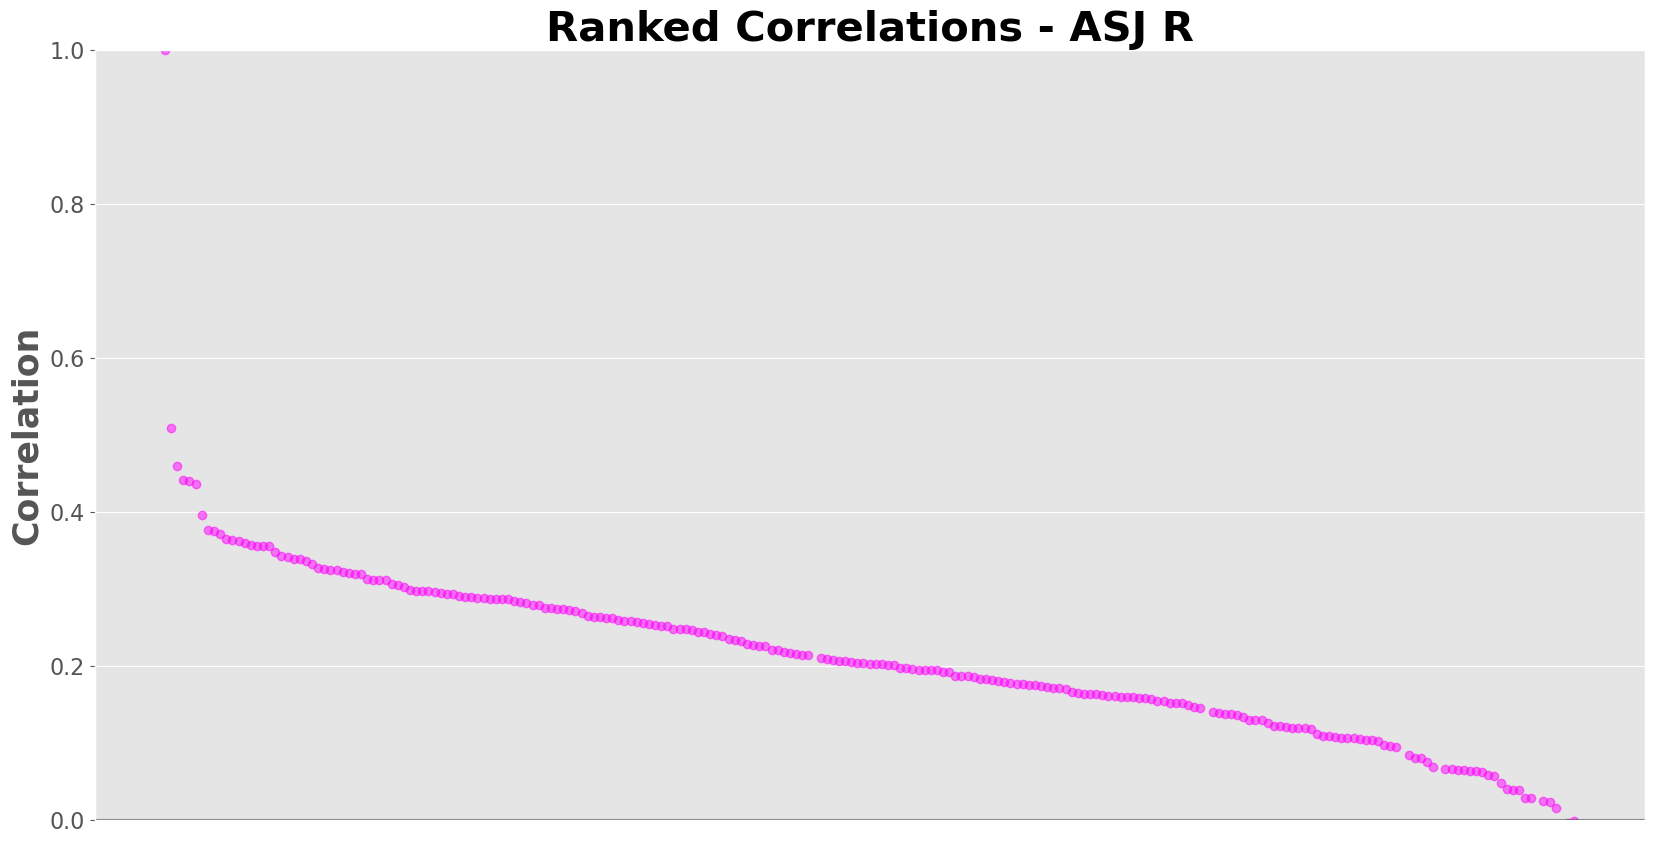

In [13]:
## This is just plotting the absolute value medians ##

fig, ax = plt.subplots(1,1, figsize=(20,10), facecolor='w') #this establishes the plotting
ax.set_title('Ranked Correlations - ASJ L', fontsize=30, weight='bold') #title
ax.plot(rank_ASJ_L_names, rank_ASJ_L_meds, 'o', color='teal', alpha=0.5)
ax.set_ylabel('Correlation', fontsize=25, weight='bold')
ax.tick_params(axis= 'y', labelsize=16)
ax.set_xticks([])
ax.set_ylim([0,1])
#plt.savefig('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/plots/031424_ASJ_L_Ranked_Correlations.png') #here you can save your figure

fig, ax = plt.subplots(1,1, figsize=(20,10), facecolor='w')
ax.set_title('Ranked Correlations - ASJ R', fontsize=30, weight='bold')
ax.plot(rank_ASJ_R_names, rank_ASJ_R_meds, 'o', color='fuchsia', alpha=0.5)
ax.set_ylabel('Correlation', fontsize=25, weight='bold')
ax.tick_params(axis= 'y', labelsize=16)
ax.set_xticks([])
ax.set_ylim([0,1])
plt.axhline(y=0, color='black', alpha=0.5)
#plt.savefig('Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/plots//031424_ASJ_R_Ranked_Correlations.png')
    

In [15]:
# Here I wanted to color-code the stimuli that was delivered since it is randomized 
# This will help you organize the data based on stimuli that was delivered

print(head1['stims'])
# 1 = butanone = paleturquoise
# 2 = pentanedoine = pink
# 3 = NaCl = yellow

color1 = []
color2 = []
color3 = []

for i in head1['stims']:
    if i[0] == 1:
        color1.append('paleturquoise')
    if i[0] == 2:
        color1.append('pink')
    if i[0] == 3:
        color1.append('yellow')
        
    if i[1] == 1:
        color2.append('paleturquoise')
    if i[1] == 2:
        color2.append('pink')
    if i[1] == 3:
        color2.append('yellow')
        
    if i[2] == 1:
        color3.append('paleturquoise')
    if i[2] == 2:
        color3.append('pink')
    if i[2] == 3:
        color3.append('yellow')

print(type(head1))

[[2 1 3]
 [2 1 3]
 [2 1 3]
 [2 1 3]
 [2 1 3]
 [3 2 1]
 [3 2 1]
 [3 2 1]
 [3 2 1]
 [3 2 1]
 [3 2 1]
 [3 2 1]
 [1 3 2]
 [1 3 2]
 [1 3 2]
 [1 3 2]
 [1 3 2]
 [2 1 3]
 [1 3 2]
 [1 3 2]
 [2 1 3]]
<class 'dict'>


In [16]:
cmap = plt.get_cmap('nipy_spectral') #this is a colormap, you can look up 'matplotlib colormap reference' to find more, for coloring by trial
count = 0
for i in range(0,21): #21 is because there's 21 trials
    fig, axs = plt.subplots(1,2, figsize=(15,6), facecolor='w')
    ax1 = axs[0]
    ax2 = axs[1]

    ax1.set_title(f"Trial {i+1} ASJ-Left", fontweight="bold") #added one to index as Python indexes at 0
    ax1.plot(ASJ_L[i], color = cmap(i*12))  #to get a wider variety of colors, I multiplied by 12
    ax1.axvspan(242, 282, facecolor=color1[i], alpha = 0.5) #duration of stimulus pulse
    ax1.axvspan(482, 522, facecolor=color2[i], alpha = 0.5) 
    ax1.axvspan(722, 802, facecolor=color3[i], alpha = 0.5)
    ax1.set_xlabel("Frames") #4sec per frame, so 63.66 minutes total recording time 
    ax1.set_ylabel("Fluorescence Intensity (A.U.)")
    
    ax2.set_title(f"Trial {i+1} ASJ-Right", fontweight="bold")
    ax2.plot(ASJ_R[i], color = cmap(i*12))
    ax2.axvspan(242, 282, facecolor=color1[i], alpha = 0.5) 
    ax2.axvspan(482, 522, facecolor=color2[i], alpha = 0.5)
    ax2.axvspan(722, 802, facecolor=color3[i], alpha = 0.5)
    ax2.set_xlabel("Frames")
    ax2.set_ylabel("Fluorescence Intensity (A.U.)")
    count += 1

    plt.close()

In [35]:
# to find out frame times I converted seconds to frames
# second (x) * 4 = frame (y)
# I got the number 4 because it was the frames per second they said
# You can find out frames per second by: mat1['fps']
# This was useful because in mat1['stim_times'] they list what SECOND times they pulsed stimuli
# So I had to figure out what FRAME time I needed to color-code
# For example, 60.5 second stimulus pulse equals 242 frames (see below numbers for ax.axvspan, 242-282)

<font color='lightgreen' size = 10>Lance's Code</font>

In [ ]:
#print(len(ASJ_L))
# 21 trials
#print(len(ASJ_L[0]))
# 955 frames per trial
#print(ASJ_L[0][0:242])

# 1 = butanone = paleturquoise
# 2 = pentanedoine = pink
# 3 = NaCl = yellow

In [25]:
### Function to extract all stimuli-specific traces for a specified neuron ###
def NeuronList_stimuli(data, neuron, left_right): 
    
    stimulus_indices = {1: [], 2: [], 3: []}

    for trial_index, trial in enumerate(data['stims']):
        for stimulus_index, stimulus in enumerate(trial):
            stimulus_indices[stimulus].append((trial_index, stimulus_index))

    stimulus_intervals = [(232, 482), (472, 722), (712, 955)]
    neuron_data = {}
    
    if left_right == 'left':
    
        neuron_L = LR_Traces(data, neuron, left_right) 

        neuron_data[f'{neuron}_L_control'] = [traces[:232] for traces in neuron_L]
        
        neuron_data[f'{neuron}_L_butanone'] = []
        neuron_data[f'{neuron}_L_pentanedoine'] = []
        neuron_data[f'{neuron}_L_NaCl'] = []
    
        for stimulus, indices in stimulus_indices.items():
            for trial_index, stimulus_index in indices:
                start, end = stimulus_intervals[stimulus_index]
                if stimulus == 1:
                    neuron_data[f'{neuron}_L_butanone'].append(neuron_L[trial_index][start:end])
                elif stimulus == 2:
                    neuron_data[f'{neuron}_L_pentanedoine'].append(neuron_L[trial_index][start:end])
                elif stimulus == 3:
                    neuron_data[f'{neuron}_L_NaCl'].append(neuron_L[trial_index][start:end])
    
        neuron_data[f'{neuron}_stimuli_list_L'] = [neuron_data[f'{neuron}_L_control'], neuron_data[f'{neuron}_L_butanone'], neuron_data[f'{neuron}_L_pentanedoine'], neuron_data[f'{neuron}_L_NaCl']]
        return neuron_data[f'{neuron}_stimuli_list_L']
    
    if left_right == 'right':
    
        neuron_R = LR_Traces(data, neuron, left_right)

        neuron_data[f'{neuron}_R_control'] = [traces[:232] for traces in neuron_R]
    
        neuron_data[f'{neuron}_R_butanone'] = []
        neuron_data[f'{neuron}_R_pentanedoine'] = []
        neuron_data[f'{neuron}_R_NaCl'] = []

        for stimulus, indices in stimulus_indices.items():
            for trial_index, stimulus_index in indices:
                start, end = stimulus_intervals[stimulus_index]
                if stimulus == 1:
                    neuron_data[f'{neuron}_R_butanone'].append(neuron_R[trial_index][start:end])
                elif stimulus == 2:
                    neuron_data[f'{neuron}_R_pentanedoine'].append(neuron_R[trial_index][start:end])
                elif stimulus == 3:
                    neuron_data[f'{neuron}_R_NaCl'].append(neuron_R[trial_index][start:end])

        neuron_data[f'{neuron}_stimuli_list_R'] = [neuron_data[f'{neuron}_R_control'], neuron_data[f'{neuron}_R_butanone'], neuron_data[f'{neuron}_R_pentanedoine'], neuron_data[f'{neuron}_R_NaCl']]
        return neuron_data[f'{neuron}_stimuli_list_R']

ASJ_stimuli_list_L = NeuronList_stimuli(head1, 'ASJ', 'left')
ASJ_stimuli_list_R = NeuronList_stimuli(head1, 'ASJ', 'right')

#print(len(AIA_stimuli_list_L[0:]))
# 4 lists for AIA L
#print(len(AIA_stimuli_list_L[0]))
# 21 trials for control
#print(len(AIA_stimuli_list_L[0][0]))
# 232 frames for control, 

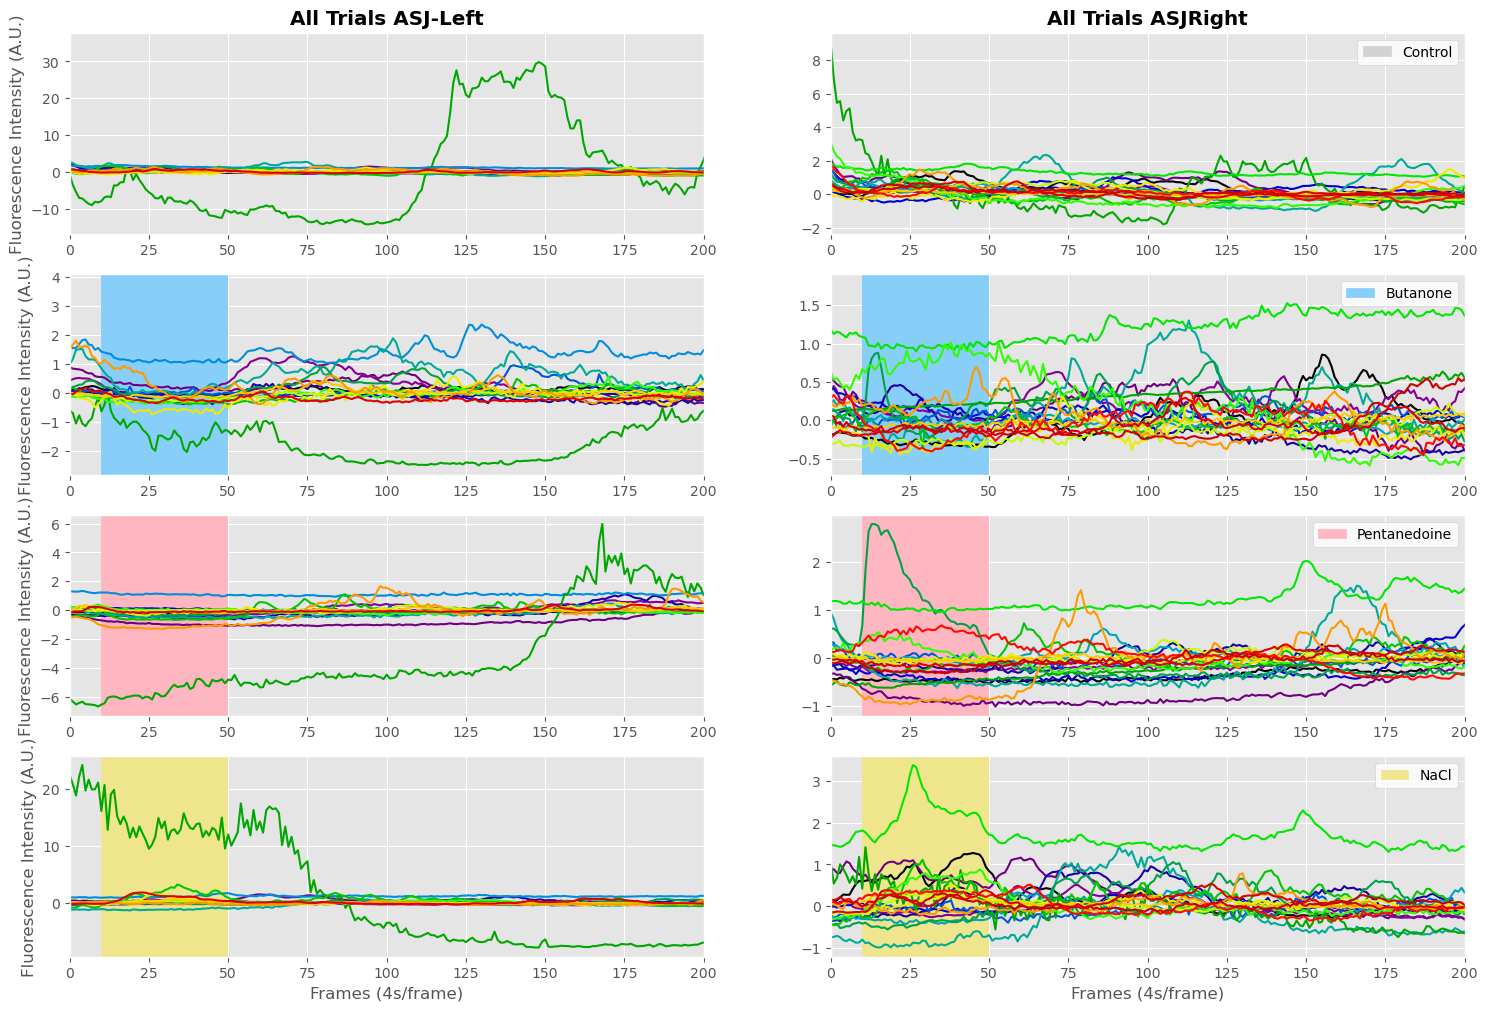

In [26]:
 ### Creating a plotting function to plot by stimuli for a specified neuron ###

def NeuronPlot_stimuli(neuron_stimuli_list_L, neuron_stimuli_list_R, title_L, title_R):    
    
    plt.style.use("ggplot") #to have plot look more like ggplot2 in R

    cmap = plt.get_cmap('nipy_spectral') #this is a colormap, you can look up 'matplotlib colormap reference' to find more, for coloring by trial

    fig, axs = plt.subplots(4,2, figsize=(18,12), facecolor='w')
    ax1 = axs[0,0]
    ax2 = axs[0,1]
    ax3 = axs[1,0]
    ax4 = axs[1,1]
    ax5 = axs[2,0]
    ax6 = axs[2,1]
    ax7 = axs[3,0]
    ax8 = axs[3,1]

    ax1.set_title(f"All Trials {title_L}", fontweight="bold") 
    ax2.set_title(f"All Trials {title_R}", fontweight="bold")

    ax7.set_xlabel("Frames (4s/frame)") 
    ax8.set_xlabel("Frames (4s/frame)")

    ax1.set_ylabel("Fluorescence Intensity (A.U.)")
    ax3.set_ylabel("Fluorescence Intensity (A.U.)")
    ax5.set_ylabel("Fluorescence Intensity (A.U.)")
    ax7.set_ylabel("Fluorescence Intensity (A.U.)")

    for i in range(0,21): 
        ax1.plot(neuron_stimuli_list_L[0][i], color = cmap(i*12))
        ax1.set_xlim(0, 200)

        ax2.plot(neuron_stimuli_list_R[0][i], color = cmap(i*12))
        ax2.set_xlim(0, 200)
        
        ax3.plot(neuron_stimuli_list_L[1][i], color = cmap(i*12)) 
        ax3.axvspan(10, 50, facecolor='lightskyblue', alpha = 0.5) 
        ax3.set_xlim(0, 200)

        ax4.plot(neuron_stimuli_list_R[1][i], color = cmap(i*12))
        ax4.axvspan(10, 50, facecolor='lightskyblue', alpha = 0.5) 
        ax4.set_xlim(0, 200)
        
        ax5.plot(neuron_stimuli_list_L[2][i], color = cmap(i*12))
        ax5.axvspan(10, 50, facecolor='lightpink', alpha = 0.5) 
        ax5.set_xlim(0, 200)

        ax6.plot(neuron_stimuli_list_R[2][i], color = cmap(i*12))
        ax6.axvspan(10, 50, facecolor='lightpink', alpha = 0.5)
        ax6.set_xlim(0, 200)

        ax7.plot(neuron_stimuli_list_L[3][i], color = cmap(i*12))
        ax7.axvspan(10, 50, facecolor='khaki', alpha = 0.5)
        ax7.set_xlim(0, 200)

        ax8.plot(neuron_stimuli_list_R[3][i], color = cmap(i*12))
        ax8.axvspan(10, 50, facecolor='khaki', alpha = 0.5)
        ax8.set_xlim(0, 200)

    patch1 = mpatches.Patch(color='lightskyblue', label='Butanone')
    patch2 = mpatches.Patch(color='lightpink', label='Pentanedoine')
    patch3 = mpatches.Patch(color='khaki', label='NaCl')
    patch4 = mpatches.Patch(color='lightgrey', label='Control')

    ax2.legend(handles=[patch4], loc='upper right', facecolor = 'white')
    ax4.legend(handles=[patch1], loc='upper right', facecolor = 'white')
    ax6.legend(handles=[patch2], loc='upper right', facecolor = 'white')
    ax8.legend(handles=[patch3], loc='upper right', facecolor = 'white')

    #plt.savefig('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/plots/ASJ_L_R_ExposureTraces.png', dpi = 900)

    return plt.show()

ASJ_test_plot = NeuronPlot_stimuli(ASJ_stimuli_list_L, ASJ_stimuli_list_R, 'ASJ-Left', 'ASJRight')


In [90]:
print(len(head1['neurons']))
print(len(head1['stims']))
print(len(head1['stims'][0]))
print(len(head1['traces'][0][0][0]))   
print(len(head1['is_L'][0][0][0]))
print(len(head1['is_L'][0][0]))
print((head1['is_L'][0][0]))



109
21
3
42
42
1
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0]]


In [91]:
## WHEN  RUNNING KERNEL WITH OLD NUMPY ###
def OtherNeurons(heads_or_tails, names_or_tracesStimuli): #this will make a master list of the neuron names and their traces
    if heads_or_tails == 'heads': #you can choose which dataset you want, heads or tails
        data_file = head1
    if heads_or_tails == 'tails':
        data_file = tail1
        
    names_temp = [] 
    traces_temp = []

    for i in range(len(data_file['neurons'])): 

        name = data_file['neurons'][i][0][0] #the files are in dictionary format, so you have to index, and then extract the first value of the nested list
        trace = data_file['traces'][i][0][0] 
        is_L = data_file['is_L'][i][0][0] 

        for j in range(0,len(is_L)):  
            if is_L[j] == 1: # 1 = Left neuron
                names_temp.append(name + '_L') #here you can add the letter 'L' to the end of the name
                traces_temp.append(trace[j][0][4:-1]) #exclude nans, which are 4 nans in beginning, 1 nan at end
                #print(len(trace[i][0][4:-1]))

            if is_L[j] == 0: # 0 = Right neuron
                names_temp.append(name + '_R')
                traces_temp.append(trace[j][0][4:-1])
            if np.isnan(is_L[j]): # nans = no left or right neuron
                names_temp.append(name) 
                traces_temp.append(trace[j][0][4:-1])

    names = [] #want to remove the duplicates
    for i in names_temp: # the names_temp basically looks like 'neuronL','neuronL','neuronL', etc and 'neuronR','neuronR'
        if i not in names: 
            names.append(i) #saving unique names to list 'names' from list 'names_temp'

    traces = np.reshape(traces_temp,(len(names), 21))
    # reshape is a function to basically take a big array and tell the dimensions that you want to reshape to
    # because the length of the names corresponds to how many traces SETS we have, we can use that variable as a number
    # and we already know that one SET has 21 

    # Transpose the traces array
    # Transpose the traces array
    # Transpose the traces array

    traces = np.transpose(traces)
    traces = traces.tolist()

    # Convert stims to a list of lists
    stims = [list(item) for item in head1['stims']]

    # Append stims to the end of each row in traces
    traces = [row + [stim] for row, stim in zip(traces, stims)]

    # Convert traces back to a numpy array
    final = np.array(traces)
    
    # Convert stims to a 2D numpy array where each element is a list
    # stims = np.array([np.array([head1['stims']])])
    # print(len(stims))
    # print(stims[0][0][0])

    # Append stims to the end of traces
    # traces = np.concatenate((traces, stims))

    if names_or_tracesStimuli == 'names': #here you can choose whether you want the list of names or the traces data
        return names
    if names_or_tracesStimuli == 'traces_and_stimuli':
        return final

head_names = OtherNeurons('heads', 'names')
head_tracesAndStimuli = OtherNeurons('heads', 'traces_and_stimuli')

tail_names = OtherNeurons('tails', 'names')
tail_tracesAndStimuli = OtherNeurons('tails', 'traces_and_stimuli')

print(len(head_traces)) #21 trials, corresponding to the 21 rows
print(len(head_traces[0])) #189 neurons per trial, and the list of stimuli for that trial appended at the end, resulting in 190 columns
print(head_traces[0][-1]) #the stimuli list is the last column, so you can index it with [i][-1] to get the stimuli for that trial

all_names = head_names+tail_names

21
190
[2, 1, 3]


/var/folders/z5/5sg9bhn17hg_r7jh5xr4v22r0000gq/T/ipykernel_41321/875938117.py:54: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  final = np.array(traces)


In [ ]:
def NeuronList_stimuli(data, neuron, left_right): 
    
    stimulus_indices = {1: [], 2: [], 3: []}

    for trial_index, trial in enumerate(data['stims']):
        for stimulus_index, stimulus in enumerate(trial):
            stimulus_indices[stimulus].append((trial_index, stimulus_index))

    stimulus_intervals = [(232, 482), (472, 722), (712, 955)]
    neuron_data = {}
    
    if left_right == 'left':
    
        neuron_L = LR_Traces(data, neuron, left_right) 

        neuron_data[f'{neuron}_L_control'] = [traces[:232] for traces in neuron_L]
        
        neuron_data[f'{neuron}_L_butanone'] = []
        neuron_data[f'{neuron}_L_pentanedoine'] = []
        neuron_data[f'{neuron}_L_NaCl'] = []
    
        for stimulus, indices in stimulus_indices.items():
            for trial_index, stimulus_index in indices:
                start, end = stimulus_intervals[stimulus_index]
                if stimulus == 1:
                    neuron_data[f'{neuron}_L_butanone'].append(neuron_L[trial_index][start:end])
                elif stimulus == 2:
                    neuron_data[f'{neuron}_L_pentanedoine'].append(neuron_L[trial_index][start:end])
                elif stimulus == 3:
                    neuron_data[f'{neuron}_L_NaCl'].append(neuron_L[trial_index][start:end])
    
        neuron_data[f'{neuron}_stimuli_list_L'] = [neuron_data[f'{neuron}_L_control'], neuron_data[f'{neuron}_L_butanone'], neuron_data[f'{neuron}_L_pentanedoine'], neuron_data[f'{neuron}_L_NaCl']]
        return neuron_data[f'{neuron}_stimuli_list_L']
    
    if left_right == 'right':
    
        neuron_R = LR_Traces(data, neuron, left_right)

        neuron_data[f'{neuron}_R_control'] = [traces[:232] for traces in neuron_R]
    
        neuron_data[f'{neuron}_R_butanone'] = []
        neuron_data[f'{neuron}_R_pentanedoine'] = []
        neuron_data[f'{neuron}_R_NaCl'] = []

        for stimulus, indices in stimulus_indices.items():
            for trial_index, stimulus_index in indices:
                start, end = stimulus_intervals[stimulus_index]
                if stimulus == 1:
                    neuron_data[f'{neuron}_R_butanone'].append(neuron_R[trial_index][start:end])
                elif stimulus == 2:
                    neuron_data[f'{neuron}_R_pentanedoine'].append(neuron_R[trial_index][start:end])
                elif stimulus == 3:
                    neuron_data[f'{neuron}_R_NaCl'].append(neuron_R[trial_index][start:end])

        neuron_data[f'{neuron}_stimuli_list_R'] = [neuron_data[f'{neuron}_R_control'], neuron_data[f'{neuron}_R_butanone'], neuron_data[f'{neuron}_R_pentanedoine'], neuron_data[f'{neuron}_R_NaCl']]
        return neuron_data[f'{neuron}_stimuli_list_R']

ASJ_stimuli_list_L = NeuronList_stimuli(head1, 'ASJ', 'left')
ASJ_stimuli_list_R = NeuronList_stimuli(head1, 'ASJ', 'right')

#print(len(AIA_stimuli_list_L[0:]))
# 4 lists for AIA L
#print(len(AIA_stimuli_list_L[0]))
# 21 trials for control
#print(len(AIA_stimuli_list_L[0][0]))
# 232 frames for control, 

In [ ]:
### EXTRACT STIMULI TRACES FOR ALL NEURONS TO COMPARE ASJ L AND R TO ###
def OTHERNeuronList_stimuli(data, neuron): 
    
    stimulus_intervals = [(232, 482), (472, 722), (712, 955)]
    neuron_data = {}
    
    neuron_L = LR_Traces(data, neuron, left_right
                         
    neuron_data[f'{neuron}_L_control'] = [traces[:232] for traces in neuron_L]
    
    neuron_data[f'{neuron}_L_butanone'] = []
    neuron_data[f'{neuron}_L_pentanedoine'] = []
    neuron_data[f'{neuron}_L_NaCl'] = []

    for stimulus, indices in stimulus_indices.items():
        for trial_index, stimulus_index in indices:
            start, end = stimulus_intervals[stimulus_index]
            if stimulus == 1:
                neuron_data[f'{neuron}_L_butanone'].append(neuron_L[trial_index][start:end])
            elif stimulus == 2:
                neuron_data[f'{neuron}_L_pentanedoine'].append(neuron_L[trial_index][start:end])
            elif stimulus == 3:
                neuron_data[f'{neuron}_L_NaCl'].append(neuron_L[trial_index][start:end])


    neuron_data[f'{neuron}_stimuli_list_L'] = [neuron_data[f'{neuron}_L_control'], neuron_data[f'{neuron}_L_butanone'], neuron_data[f'{neuron}_L_pentanedoine'], neuron_data[f'{neuron}_L_NaCl']]
    return neuron_data[f'{neuron}_stimuli_list_L']
    

    neuron_data[f'{neuron}_stimuli_list_R'] = [neuron_data[f'{neuron}_R_control'], neuron_data[f'{neuron}_R_butanone'], neuron_data[f'{neuron}_R_pentanedoine'], neuron_data[f'{neuron}_R_NaCl']]
    return neuron_data[f'{neuron}_stimuli_list_R']

OTHERneurons_stimuli_Head_control = OTHERNeuronList_stimuli(head_tracesAndStimuli, 'ALL NEURONS')
OTHERneurons_stimuli_Tail_control = OTHERNeuronList_stimuli(tail_tracesAndStimuli, 'ALL NEURONS')

OTHERneurons_stimuli_Head_butanone = OTHERNeuronList_stimuli(head_tracesAndStimuli, 'ALL NEURONS')
OTHERneurons_stimuli_Tail_butanone = OTHERNeuronList_stimuli(tail_tracesAndStimuli, 'ALL NEURONS')

OTHERneurons_stimuli_Head_pentanedoine = OTHERNeuronList_stimuli(head_tracesAndStimuli, 'ALL NEURONS')
OTHERneurons_stimuli_Tail_pentanedoine = OTHERNeuronList_stimuli(tail_tracesAndStimuli, 'ALL NEURONS')

OTHERneurons_stimuli_Head_nacl = OTHERNeuronList_stimuli(head_tracesAndStimuli, 'ALL NEURONS')
OTHERneurons_stimuli_Tail_nacl = OTHERNeuronList_stimuli(tail_tracesAndStimuli, 'ALL NEURONS')





### ADJUST CORRELATION FUNCTION TO BE STIMULI-SPECIFIC ###

def Correlate(neuron1, ASJ_neuron): #neuron 1 is the list of neurons, ASJ_neuron is ASJ L or R

    correlations = np.empty((len(neuron1), 21)) #make an empty array with the same number of rows as there are neurons (189 for head, 42 for tail), and 21 traces
    
    correlations[:] = np.nan #fill with nans

    for i in range(0,len(neuron1)): #loop through each neuron
        for j in range(0, 21): #loop through each of the 21 trials
            try: #using try, except, and continue together is useful because if something doesn't work, it will skip instead of 'breaking' the loop 
                length = len(neuron1[i][j]) 
                corr = np.corrcoef(neuron1[i][j][:length], ASJ_neuron[j][:length]) #setting so the length of the neuron trace is the same for both #np.corrcoef uses the Pearson correlation coefficient test
                correlations[i][j] = corr[0][1]
                # now save that value in the correlations list of nans. correlations[i][j] will now correspond with the location
                # of neuron1[i][j]. the corr[0][1] is just a weird part of the corrcoef function - this location
                # just refers to the actual correlation value
            except: 
                continue 
            
    return correlations

corr_head_ASJ_L_control = Correlate(OTHERneurons_stimuli_Head_control, ASJ_stimuli_list_L[0])
corr_head_ASJ_L_butanone = Correlate(OTHERneurons_stimuli_Head_butanone, ASJ_stimuli_list_L[1])
corr_head_ASJ_L_pentanedoine = Correlate(OTHERneurons_stimuli_Head_pentanedoine, ASJ_stimuli_list_L[2])
corr_head_ASJ_L_nacl = Correlate(OTHERneurons_stimuli_Head_nacl, ASJ_stimuli_list_L[3])

corr_head_ASJ_R_control = Correlate(OTHERneurons_stimuli_Head_control, ASJ_stimuli_list_R[0])
corr_head_ASJ_R_butanone = Correlate(OTHERneurons_stimuli_Head_butanone, ASJ_stimuli_list_R[1])
corr_head_ASJ_R_pentanedoine = Correlate(OTHERneurons_stimuli_Head_pentanedoine, ASJ_stimuli_list_R[2])
corr_head_ASJ_R_nacl = Correlate(OTHERneurons_stimuli_Head_nacl, ASJ_stimuli_list_R[3])

corr_tail_ASJ_L_control = Correlate(OTHERneurons_stimuli_Tail_control, ASJ_stimuli_list_L[0])
corr_tail_ASJ_L_butanon = Correlate(OTHERneurons_stimuli_Tail_butanone, ASJ_stimuli_list_L[1])
corr_tail_ASJ_L_pentanedoine = Correlate(OTHERneurons_stimuli_Tail_pentanedoine, ASJ_stimuli_list_L[2])
corr_tail_ASJ_L_nacl = Correlate(OTHERneurons_stimuli_Tail_nacl, ASJ_stimuli_list_L[3])

corr_tail_ASJ_R_control = Correlate(OTHERneurons_stimuli_Tail_control, ASJ_stimuli_list_R[0])
corr_tail_ASJ_R_butanone = Correlate(OTHERneurons_stimuli_Tail_butanone, ASJ_stimuli_list_R[1])
corr_tail_ASJ_R_pentanedoine = Correlate(OTHERneurons_stimuli_Tail_pentanedoine, ASJ_stimuli_list_R[2])
corr_tail_ASJ_R_nacl = Correlate(OTHERneurons_stimuli_Tail_nacl, ASJ_stimuli_list_R[3])



all_traces_L = np.concatenate((corr_head_ASJ_L, corr_tail_ASJ_L))
all_traces_R = np.concatenate((corr_head_ASJ_R, corr_tail_ASJ_R))

print(len(corr_head_ASJ_L))
print(len(corr_tail_ASJ_L))
print(len(all_traces_L))

In [ ]:
def Ranking(array, names, analysis_variable): 
    ranked = np.zeros((len(names), 21)) #make empty array the length of all neurons (189), by 21 trials
    name = []
    medians = []
    true_medians = []
    ranked_meds = []
    absolute_meds = []

    for i in array: 
        med = np.nanmedian(i) #want the median value of the correlation values because medians will exclude weird outliers
        medians.append(abs(med)) #correlation is correlation, doesn't matter positive or negative
        true_medians.append(med)
        
    reverse_sort = np.sort(medians)[::-1] #sorts highest to highest

    for i in range(0,len(names)): 
        where = np.where(reverse_sort[i] == medians) #find where the value of the reverse_sort ranking matches the values of the medians
        num_where = where[0][0]
        ranked[i] = (array[num_where]) #now I can save the location of the neuron order to 'ranked'
        name.append(names[num_where]) #appending name of indexed neuron
        ranked_meds.append(true_medians[num_where])
        absolute_meds.append(medians[num_where])
        
    if analysis_variable == 'names':
        return name
    if analysis_variable == 'correlations':
        return ranked
    if analysis_variable == 'medians': #this will be ranked based on absolute value, but I don't think you need it anymore
        return absolute_meds
    if analysis_variable == 'true medians': #this is ranking with their true values
        return ranked_meds

rank_ASJ_L = Ranking(all_traces_L, all_names, 'correlations')
#print(rank_ASJ_L)
rank_ASJ_L_names = Ranking(all_traces_L, all_names, 'names')
print(rank_ASJ_L_names)
rank_ASJ_L_meds = Ranking(all_traces_L, all_names, 'true medians')
#print(rank_ASJ_L_names[:10]) #if you want just top 10 hits

rank_ASJ_R = Ranking(all_traces_R, all_names, 'correlations')
rank_ASJ_R_names = Ranking(all_traces_R, all_names, 'names')
rank_ASJ_R_meds = Ranking(all_traces_R, all_names, 'true medians')
print(rank_ASJ_R_names)



# Just the top 10 hits
top10_rank_ASJ_L = rank_ASJ_L[0:12]
#print(top10_rank_ASJ_L)
top10_rank_ASJ_L_names = rank_ASJ_L_names[0:12] 
print(top10_rank_ASJ_L_names)

#I noticed that the top 2 hits are with itself (ASJL and ASJR) lol, so we can use [2:12] instead of [:10]
#BUT if you want to show that the top 2 hits are with itself, then use the [:10], idk if Andrew would want to 
#show that, because it's actually a good control and proof of concept to show that the ranking system works lol :) 

# ------- #
# Okay I plotted the original top10 hits, but I noticed 2 of them were strange for ASJ R dataset
#if you use [2:12] then it's index 0 and 3 that are strange
#if you use [:10] then it would be index 2 and 5
#make sure you match the index below accordingly based on if you use [2:12] or [:10]
# so the new index is going to ignore these 2, but if you want to plot it then you can just use [2:12] or [:10]

top10_rank_ASJ_R = np.concatenate((rank_ASJ_R[:2] , rank_ASJ_R[3:5], rank_ASJ_R[6:14])) #this is for [2:12]
#If you want index for [:10] then it would be [:2] + [3:5] + [6:12]
#print(top10_rank_ASJ_R)

top10_rank_ASJ_R_names = rank_ASJ_R_names[:2] + rank_ASJ_R_names[3:5] + rank_ASJ_R_names[6:14]
print(top10_rank_ASJ_R_names)


In [ ]:
### ADJUST SO THAT THIS CREATES 4 PLOTS BASED ON ASJ L AND R CORRELATION WITH OTHER NEURONS BASED ON STIMULI EXPOSURE ###

# This is plotting the top 10
dF_L = pd.DataFrame(top10_rank_ASJ_L.T, columns=top10_rank_ASJ_L_names) #make a pandas dataframe-easier for plotting
#Notice that I used .T, that transposes things to make them inverted (I have no idea why, but plotting boxplots 
#makes things inverted for some reason...)
#print(dF_L)

def stimuli_correlation_top10(top10_rank_ASJ_L_stimuli, top10_rank_ASJ_R_stimuli) ):
    plt.style.use("ggplot") #to have plot look more like ggplot2 in R
    colors1 = sns.color_palette("Set2") #If you look up 'matplotlib colormap reference' you can find a list of options

    fig, ax = plt.subplots(4,2, figsize=(14,11), facecolor='w') #this establishes the plotting



    for i in top10_rank_ASJ_L.T: #this is for plotting the connecting lines, normally you don't need to loop to plot
        ax.set_title('ASJ-L Correlation with other Neurons', fontsize=30, weight='bold') 
        sns.boxplot(data=dF_L, palette=colors1, linewidth = 5) 
        sns.swarmplot(data=dF_L, size=10, color='black') 
        #ax.plot(i, alpha=0.5) #for plotting connecting lines - to look at trends of trials across neurons
        plt.xticks(rotation=60) 
        ax.set_ylabel('Correlation', fontsize=25, weight='bold')
        ax.xaxis.set_tick_params(labelsize=20)
        ax.yaxis.set_tick_params(labelsize=16)
        ax.set_ylim([-1,1])
        plt.axhline(y=0, color='black', alpha=0.5) #I drew a black line for number 0 because that shows no correlation
        plt.savefig('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/plots/031424_ASJ_L_Ranked_Correlations.png', dpi = 900)



    # Repeat the same things for ASJ R    
    dF_R = pd.DataFrame(top10_rank_ASJ_R.T, columns=top10_rank_ASJ_R_names)
    #print(dF_R)

    plt.style.use("ggplot") #to have plot look more like ggplot2 in R
    colors2 = sns.color_palette("Set3")

    fig, ax = plt.subplots(1,1, figsize=(14,11), facecolor='w')
    for i in top10_rank_ASJ_R.T:
        ax.set_title('ASJ-R Correlation with other Neurons', fontsize=30, weight='bold')
        sns.boxplot(data=dF_R, palette=colors2, linewidth = 5)
        sns.swarmplot(data=dF_R, size=10, color='black')
        #ax.plot(i, alpha=0.5)
        plt.xticks(rotation=60)
        ax.set_ylabel('Correlation', fontsize=25, weight='bold')
        ax.xaxis.set_tick_params(labelsize=20)
        ax.yaxis.set_tick_params(labelsize=16)
        ax.set_ylim([-1,1])
        plt.axhline(y=0, color='black', alpha=0.5)
        plt.savefig('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/plots/031424_ASJ_R_Ranked_Correlations.png', dpi = 900)

    return plt.show()

ASJ_stimulisBasedCorrelation = stimuli_correlation_top10(top10_rank_ASJ_L_stimuli, top10_rank_ASJ_R_stimuli)